<a href="https://colab.research.google.com/github/ev1025/DA_Study/blob/main/Tableau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 태블로

[실습자료](https://public.tableau.com/app/profile/.21716891)

- Data Literacy : 데이터를 보고 활용할 수 있는 능력
- 탐색을 통해 자신이 이해하고 대화와 협업을 통해 찾은 현상과 통찰 공유

**태블로 제품**
- 데이터 전처리 : Tableau Prep
- 데이서 시각화 : Tableau Desktop
- 데이터 읽기 : Tableau Reader
- 파일 업로드 : Tableau Server(온프레미스), Tableau Online(태블로 제공서버사용)

**인간이 잘 분별해내는 시각조건**
> 위치 > 길이 > 방향 > 각도 > 면적 > 부피 > 채도   

즉, 파이차트나 영역차트는 잘 사용하지 않음 => 원하면 도넛차트를 사용할 것

**시각화 체크리스트**
- 질문에 대한 **핵심 메세지**가 명확한가
- **Action Item(행동을 촉진하는 내용**)이 있는가?
- 상대방과 나 사이에 공유된 **컨텍스트**를 고려했는가?
- 인사이트를 **이해하기 쉬운 형태**로 전달했는가?

**시각화 주의사항**
- 3D차트는 쓰지않는다.(정보왜곡)
- **막대그래프**의 축은 **반드시 0**부터 사용한다.
- **라인그래프**에서는 **경향의 차이**를 보기위해 0부터 시작하지 않아도 된다.
- **이중축**은 왼쪽 오른쪽 어느 수치를 보야아하는지 혼란스러우므로 **사용 자제**
- **산포도(상관관계)**를 그릴 때는 **X축**(**원인**) **Y축**(**결과**)를 표시
- **시간축**은 **가로로 배치**하는 것이 좋음

**스토리 텔링**
> **상황(Context)** -> **문제(Problum)** -> **해결(Action)**

> 평균 구독 62% -> 일부 국가23% ->  맞춤콘텐츠를 제작 구독이 낮은 국가의 구독률을 올림

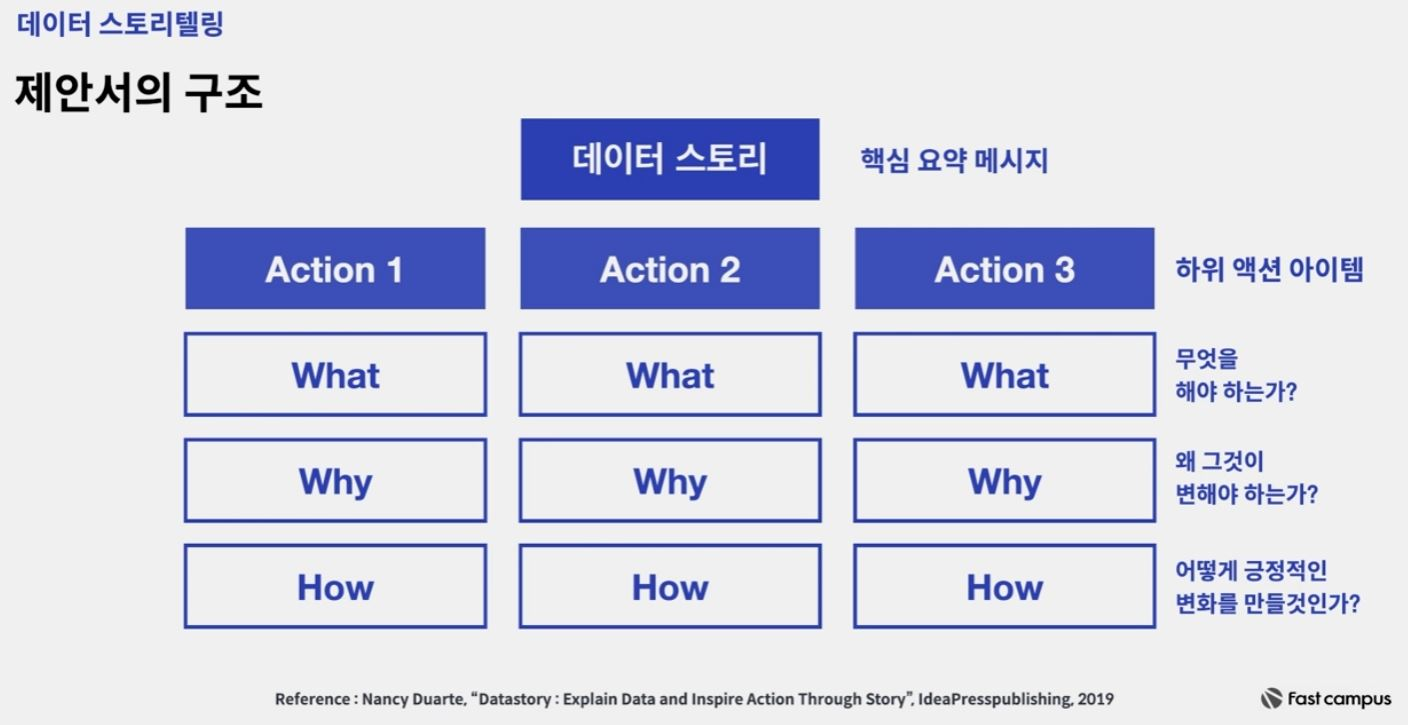

**임원진에게 보고할 때**
1. 수익(Revenue)를 극대화하고, 비용(Cost)를 줄이는 방향
2. 시장점유율(Market Share)을 높이고, 출시시간(Time to Market)을 단축
3. 고객유지율(Retention)을 높이고, 위험(Risk)를 줄이는 방향

**데이터 가져오기**
1. 구글 스프레드시트에 IMPORTHTML('주소', 'TABLE','몇번째 표인지') : 자동으로 업데이트됨
2. 웹데이터 커넥터 : [사이트](https://tableau.github.io/webdataconnector/community/)에서 URL 복사해서 사용


**데이터 원본 새로고침**
- 라이브연결 : 데이터베이스에서 쿼리를 보내고 결과에 따라 뷰 업데이트
- 추출 : 성능 향상을 위한 데이터를 로컬에 저장(오프라인)


**서식 계층구조**
- 도구설명 / 제목 / 마크 > 필드레이블 > 특정 필드 > 행/열 서식 > 워크시트 서식 > 통합 문서 서식

**측정값, 연속형(초록색 #)**
- 숫자형식
- 드로그앤 드롭, 더블클릭으로 차트를 만듬
- 설정된 집계(합계, 평균 등..)에 따라 차트를 만들게 된다.
- 색상을 입히면 그라데이션 범례

**차원, 불연속형(파란색)**
- 측정값으로 만들어진 차트를 어떻게 나눌 것인지
- 색상을 입히면 분류해주는 범례

In [ ]:
# 계산식필드(매출합이 평균보다 크면 True 작으면 False)
SUM(매출) >= WINDOW_AVG(SUM(매출))

// 매출이 평균이상 == True
// 매출이 평귱미만 == False

In [ ]:
# IF문(연도가 2021년이면 매출을 가져온다)
IF YEAR([연도]) = 2021 THEN [매출] END

# IIF문(시도가 서울시이면 매출을 가져오고 아니면 NULL)
IIF([시도]='서울시',[매출],NULL)

# 측정값이 NULL이면 값으로 표현
IFNULL(측정값, 값)

In [ ]:
# 매개변수(화면에 표시되는 카테고리값)을 측정값과 연결시킬 때
CASE 매개변수
WHEN 조건 THEN 값
ELSE 값 END 

In [ ]:
# 날짜 -> 정수
year(date타입)

# 날짜 -> 정수
DATEPART('year',날짜차원)
DATEPART('month',날짜차원)

# str -> 날짜형식
DATEPARSE('yyyyMM', '202201') # '표시형식', '문자열'

# 날짜차이(정수로 추출)
DATEDIFF('month', 시작달, 끝달) # 끝달 - 시작달 몇개월 차이인지

# 시작하는 날로 지정
DATETRUNC('원하는타입', [날짜])
DATETRUNC('year', [2022.02.03]) => 2022.01.01     # 2022년의 첫째날
DATETRUNC('month', [2022.02.03]) => 2022.02.01    # 2월의 첫째날
DATETRUNC('quarter', [2022.05.04]) => 2022.04.01  # 5월은 2분기에 포함되어서 2분기 첫날로 변경

**MTD(Month To Date)**
- 월누계, 해당월의 시작일 부터 현재(또는 선택일)까지의 누계를 의미한다.
- YTD(연누계), QTD(분기누계) 등등

In [ ]:
# 1. p.날짜(매개변수) 만들기
날짜형식으로, 현재값(현재날짜), 허용 가능한값(범위)

# 2. f.MTD(필터) 만들기
DATEDIFF('month', 날짜차원, [p.날짜]) AND
날짜차원 <= [p.날짜]

# 3. c.MTD (필터제거 할 측정값)
IIF([f.MTD], [수익], NULL)

---

**[테이블 계산함수](https://help.tableau.com/current/pro/desktop/ko-kr/functions_functions_tablecalculation.htm)**
- 태블로의 인덱스는 1부터 시작

In [ ]:
import pandas as pd
df = pd.DataFrame({'index':(1,2,3,4,5,6)})
df

,index
0,1
1,2
2,3
3,4
4,5
5,6


**FIRST()**
- 현재 행에서 첫번째 행까지의 수
- 인덱스3에서의 FIRST() 값은 -2

**LAST()** 
- 현재행에서 마지막 행까지 수
- 인덱스 3에서 LAST() 값은 3

**INDEX()**
- 값의 정렬없이 현재 순서대로 인덱스 부여

**WINDOW_AVG(측정값, [시작, 끝])**
- 해당 계산값의 시작값부터 끝값까지의 평균
- Default는 전체값
- 평균 이상값 조건으로 쓸 때 : 측정값 > WINDOW_AVG(측정값)

In [ ]:
# 수익이 최고이거나 최저인 고객 표시(계산된 필드)
if SUM([수익]) = WINDOW_MAX(SUM(수익))
or SUM([수익]) = WINDOW_MIN(SUM(수익))
THEN ATTR([고객명]) # ATTR은 제일처음 요소의 속성을 가져옴 (집계함수로 만들어주기 위해서 사용)
END

In [ ]:
# 차원고정
{ FIXED [고정차원] : 집계함수 [차원] }

# 최초, 마지막 구매일자(계산된 필드)
{ FIXED [고객명] : MIN([구매일자])}
{ FIXED [고객명] : MAX([구매일자])}

**구글시트에서 데이터 가져오기**
- =GOOGLEFINANCE("035420","close",DATE(2014,1,1),TODAY())
- 주식번호, (시가,종가,고가,저가), 시작날짜, 끝날짜
- 구글드라이브에 저장해서 사용가능
- 데이터는 다음날 자동으로 업데이트됨

**구글시트에서 네이버금융 데이터 가져오기**
- =IMPORTHTML("URL",  "테이블을가져오겠다", "해당사이트의 몇 번째 테이블을 가져올건지")
- =IMPORTHTML("https://finance.naver.com/sise/sise_market_sum.naver", "table", 2)

**유튜브 API**
- https://developers.google.com/apps-script/samples/automations/youtube-tracker?hl=ko에서 사본만들기
- 구글시트 비디오링크에 유튜브 주소 쓰기
- 확장프로그램 - Apps Script
- Apps Script 왼쪽에 서비스+ -> YouTube Data API 선택 -> 위에 실행 선택 -> 고급선택해서 권한 허용
- 구글스프레드시트에 완성

---

**라인차트**
- 시간순서에 따른 추세를 보는데 적합
- 날짜유형
   - 예시 : 2020년 ~ 2023년 날짜자료를 월별로 선택하면
   - 불연속형 : 각 월의 평균값 (12개)
   - 연속형 : 각 년도의 월별 평균값(36개)

- 날짜별 순서대로 경로를 만들고 싶을 때 (이진우의 매출 : 1분기 ->2분기->3분기)
   - 마크를 라인으로 변경
   - 구분할 차원을 세부정보에 넣기(고객명, 지역 등..)
   - 마크에 불연속형날짜 레이블에 넣기(순서 정할 날짜 일자별로 나눌건지, 월별로 나눌건지)
   - 마크에 INDEX()함수 생성, 경로로 변경

   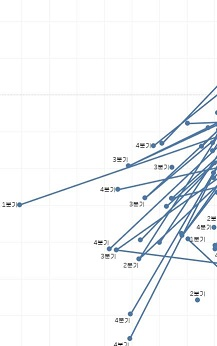

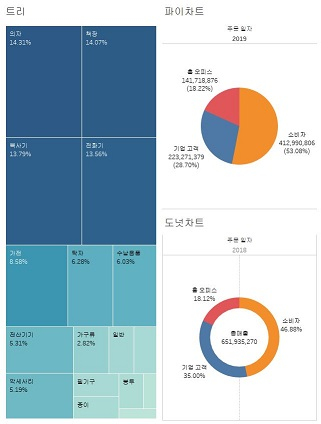

**Slope차트**

- 두 지점의 값을 비교하는데 사용

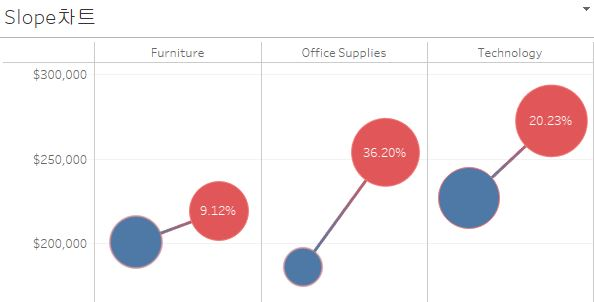


**태블로 성능 높이기**
1. 마크 수 줄이기(고객명 다 나오게 한다던지..)
2. 필터 수 최소화(필터가 많을 수록 느려짐, 계산필드 iif(계산필드(필터에들어갈bool), 참, 거짓)
3. 대시보드 개수는 하나에 3~4개로 제한

**아이콘 삽입** :
내 문서 > 내 Tableau 리포지토리 > 모양 > 새폴더 만들어서 사용

**[맵박스 연동하기](https://www.boostcourse.org/ds121/lecture/865840?isDesc=false) 11분 35초 영상참고**
